In [23]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import the ML algorithm
from sklearn.linear_model import LinearRegression

# import libraries for model validation
from sklearn.model_selection import train_test_split

# import libraries for metrics
from sklearn import metrics


### Load the data

In [24]:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
df.shape

(25, 2)

### Visualize the relationship between the feature and the response using scatterplot

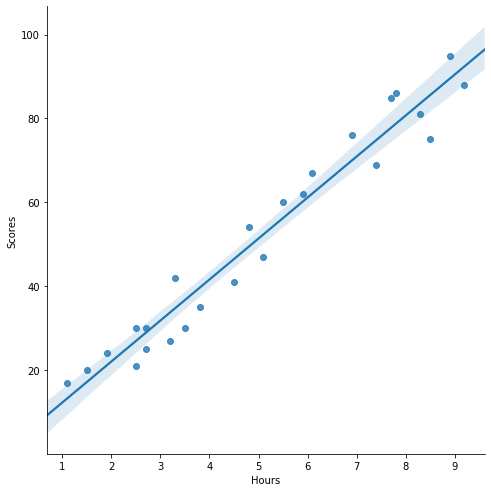

In [26]:
sns.pairplot(df,
             x_vars=['Hours'],
             y_vars=['Scores'],
             height=7, 
             aspect=1, 
             kind='reg')

In [16]:
X =np.array(df.Hours).reshape(-1,1)
y=np.array(df.Scores).reshape(-1,1)

In [17]:
# Splitting X and y into training and testing sets
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=2,test_size = 0.2)

In [27]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# beta coeff
linreg.coef_

array([[9.94061514]])

In [29]:
# the intercept
linreg.intercept_

array([1.50791048])

### The linear equation is :
### y = 1.50791048 + 9.94061514*Hours

In [30]:
# Predictions
y_pred = linreg.predict(X_test)

In [31]:
new_data = np.array(9.25).reshape(1,-1)
pred = linreg.predict(new_data)
pred

array([[93.45860056]])

### Model evaluation metrics for regression

In [11]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  4.877039354964484
Mean Sq  Error MSE      :  24.38762033985666
Root Mean Sq Error RMSE :  4.938382360637607
MAPE                    :  16.15074593680487
MPE                     :  3.687013907087185
r2 value                :  0.9735538080811826


The model has R2 value = 0.973 which is near to 1. Therefore, the model is pretty good.